In [143]:
# Carregando as Bibliotecas

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
from sklearn.preprocessing import StandardScaler

# Setando padrão sns (deixa os gráficos mais bonitos)
# Setando formato numérico para visualização
import matplotlib.style as style 
#style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
pd.options.display.float_format = '{:.5f}'.format

# Análise Exploratória

In [96]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S


In [97]:
# Info do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
# Estatistica Descritiva
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00000,891.00000,891.00000,714.00000,891.00000,891.00000,891.00000
mean,446.00000,0.38384,2.30864,29.69912,0.52301,0.38159,32.20421
std,257.35384,0.48659,0.83607,14.52650,1.10274,0.80606,49.69343
min,1.00000,0.00000,1.00000,0.42000,0.00000,0.00000,0.00000
25%,223.50000,0.00000,2.00000,20.12500,0.00000,0.00000,7.91040
50%,446.00000,0.00000,3.00000,28.00000,0.00000,0.00000,14.45420
75%,668.50000,1.00000,3.00000,38.00000,1.00000,0.00000,31.00000
max,891.00000,1.00000,3.00000,80.00000,8.00000,6.00000,512.32920


In [99]:
# Observando valores nulos em cada coluna
pd.DataFrame({'Num_Missing_Values':df.isnull().sum(),
'%_Missing_Values':df.isnull().sum()/len(df)})

,Num_Missing_Values,%_Missing_Values
PassengerId,0,0.00000
Survived,0,0.00000
Pclass,0,0.00000
Name,0,0.00000
Sex,0,0.00000
Age,177,0.19865
SibSp,0,0.00000
Parch,0,0.00000
Ticket,0,0.00000
Fare,0,0.00000


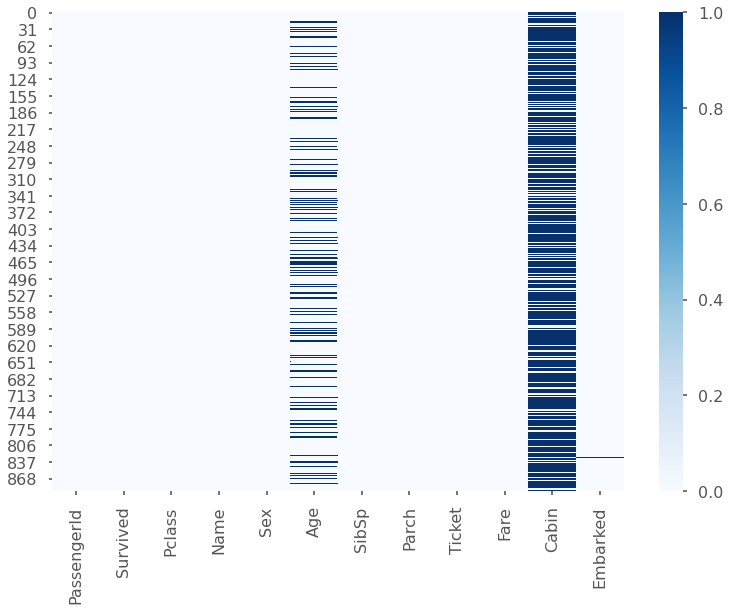

In [100]:
sns.heatmap(df.isnull(), cmap='Blues')

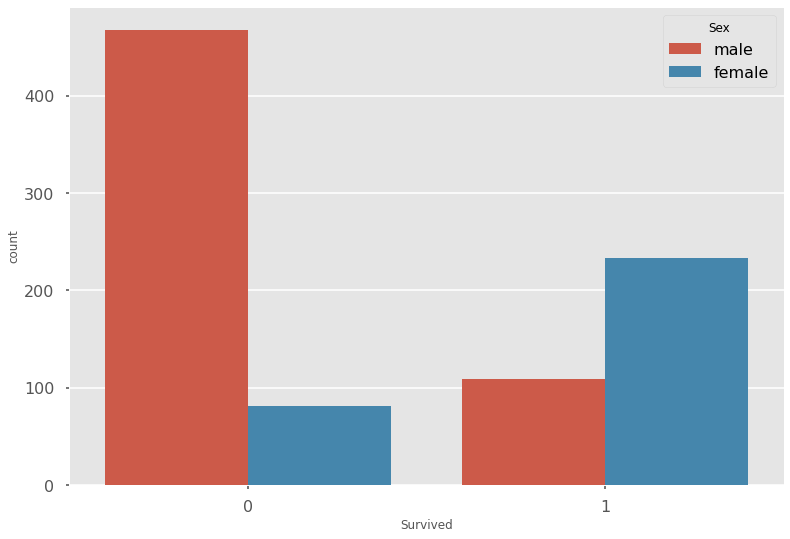

In [101]:
# Quantidade de sobreviventes por sexo
sns.countplot(x='Survived', data=df, hue='Sex')

In [102]:
# Visualizando os numeros por sexo
sex_survived = df.groupby(['Survived','Sex']).count()['PassengerId'].to_frame()
sex_survived

PassengerId
Survived Sex                
0        female           81
         male            468
1        female          233
         male            109

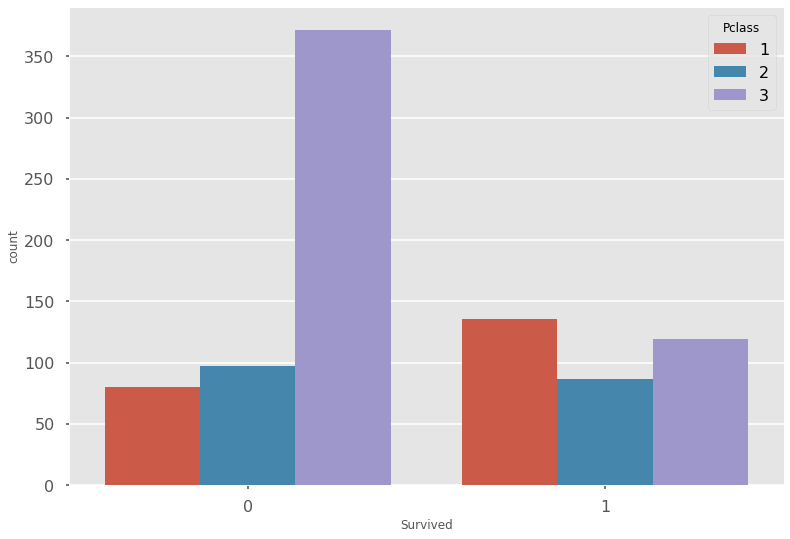

In [103]:
# Quantidade de sobreviventes por classe
sns.countplot(x='Survived', data=df, hue='Pclass')

In [104]:
# Visualizando os numeros por classe
pclass_survived = df.groupby(['Survived','Pclass']).count()['PassengerId'].to_frame()
pclass_survived

PassengerId
Survived Pclass             
0        1                80
         2                97
         3               372
1        1               136
         2                87
         3               119

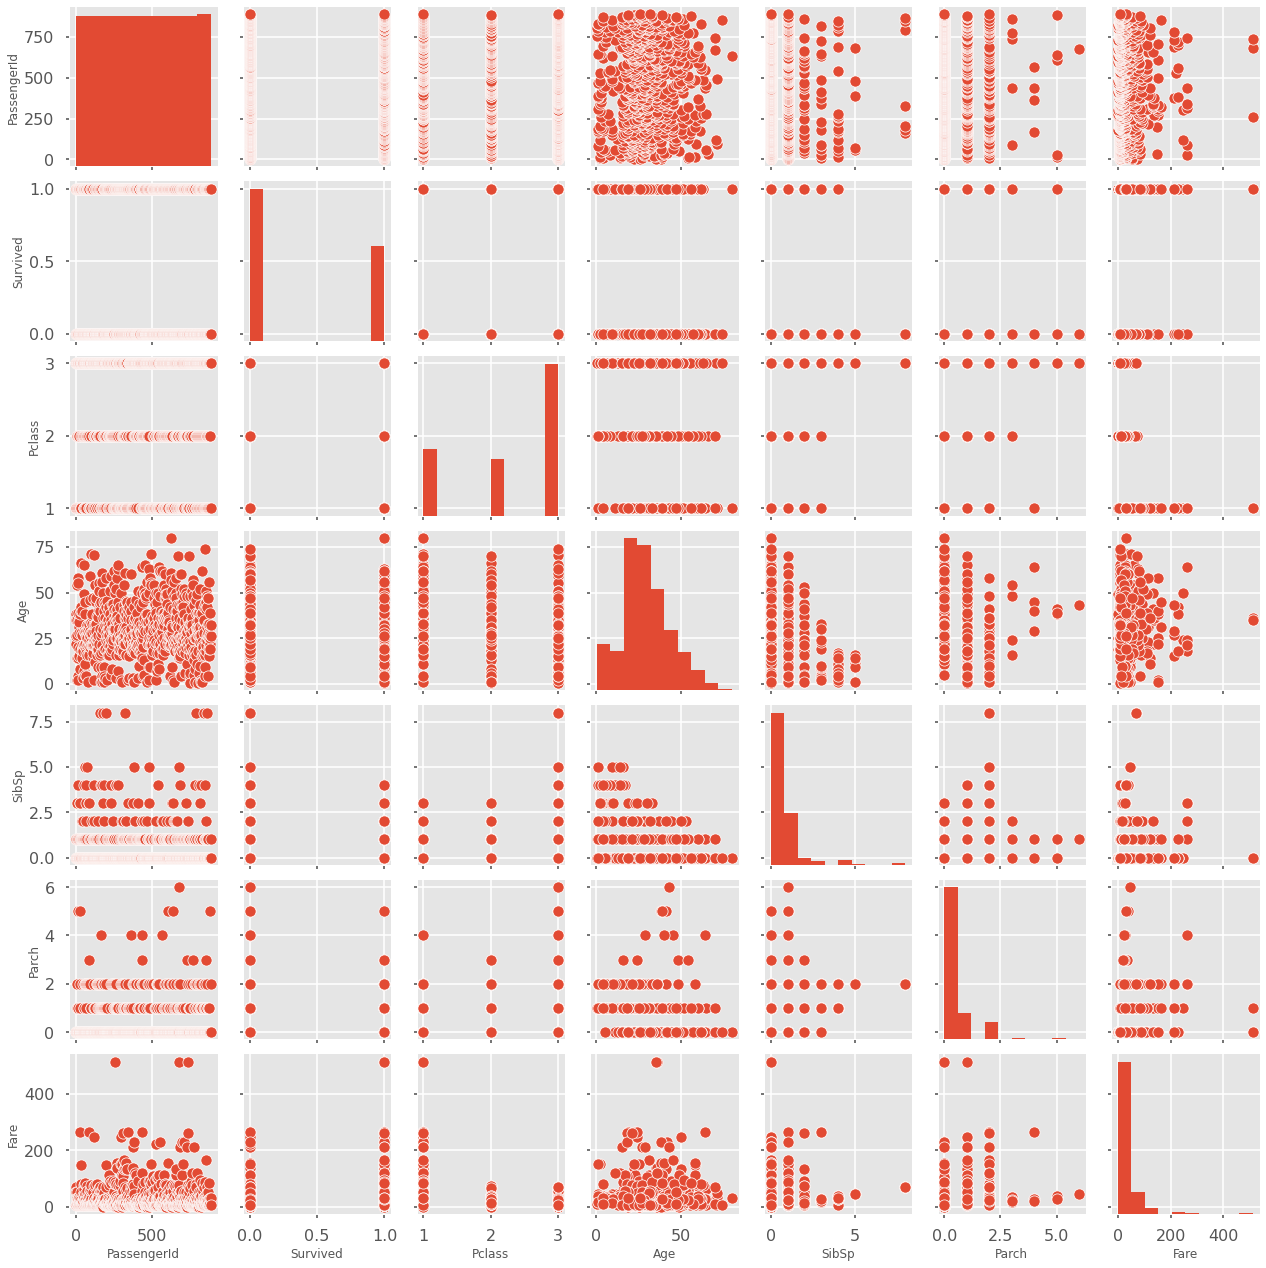

In [105]:
# Relações entre váriaveis
sns.pairplot(df)

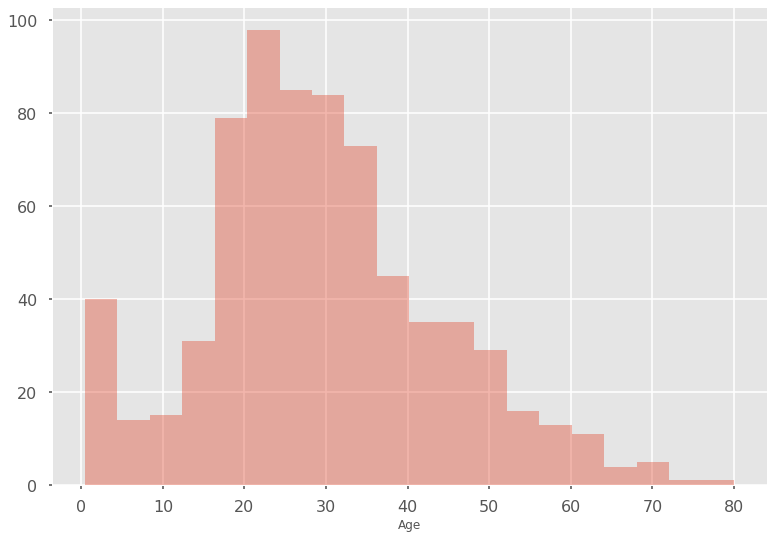

In [106]:
sns.distplot(df['Age'], kde=False)

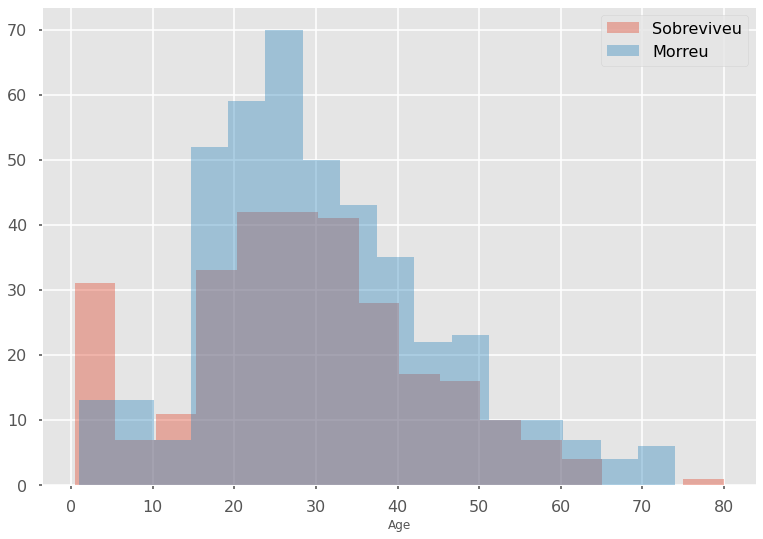

In [107]:
# Distribuição da idade por sobrevivencia
sns.distplot(df['Age'][df['Survived']==1],kde=False, label='Sobreviveu')
sns.distplot(df['Age'][df['Survived']==0],kde=False, label='Morreu')
plt.legend()

In [108]:
# Podemos perceber que há uma incidencia de maiores sobrevivencia entre
# crianças abaixo de 20 anos. 

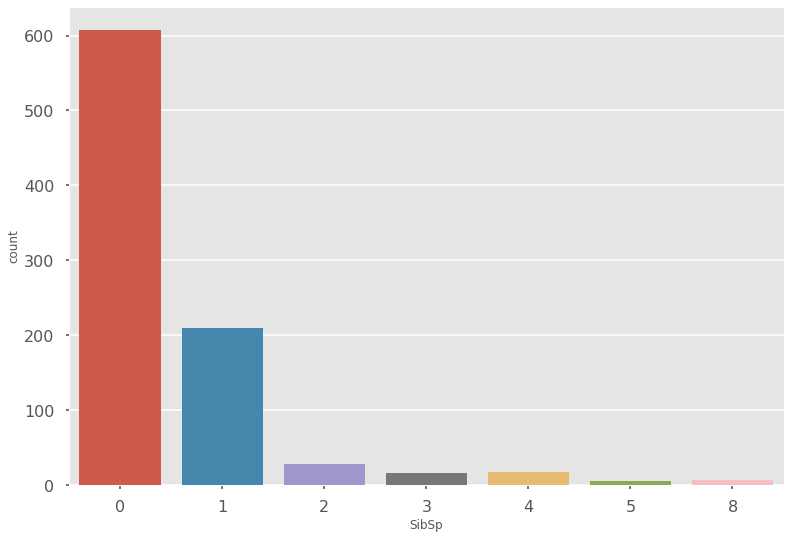

In [109]:
# Verificando distribuição de pessoas baseado em
# numero de irmãos ou conjugues a bordo
sns.countplot(x='SibSp', data=df)

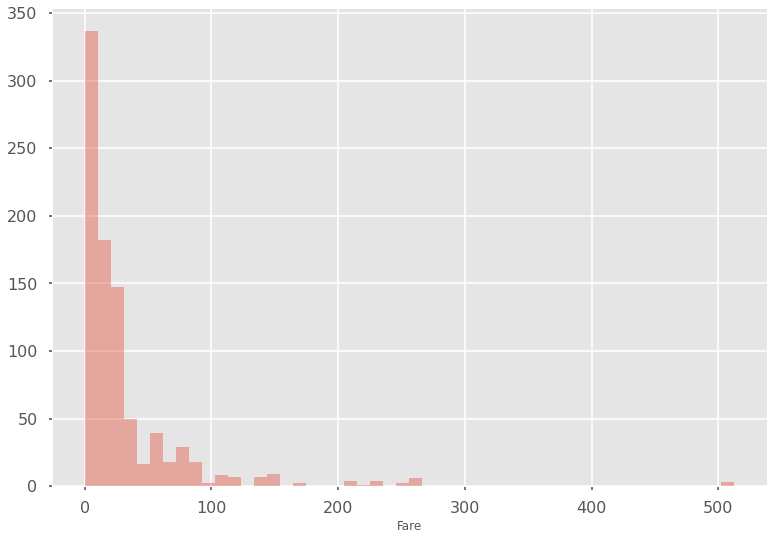

In [110]:
# Distribuição por preço de passagem
sns.distplot(df['Fare'], kde=False, bins=50)

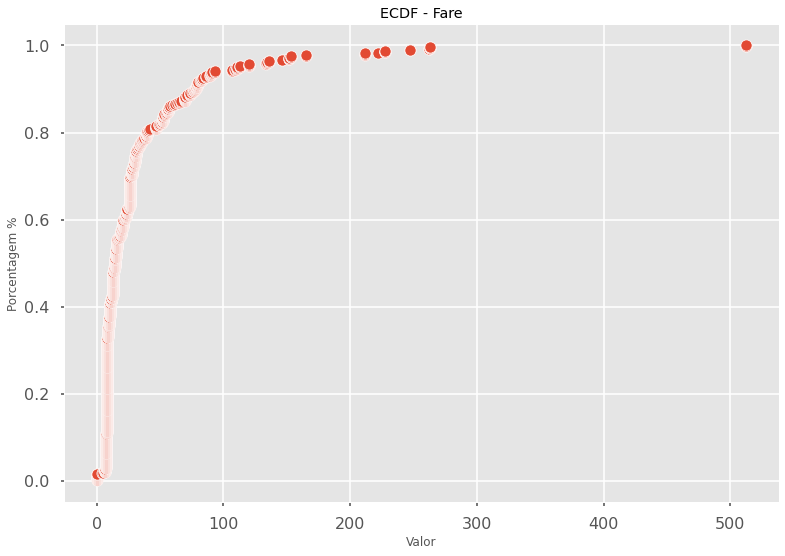

In [111]:
# Podemos plotar o ECDF para visualizar a porcentagem de cada valor, por exemplo:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(df['Fare'])
sns.scatterplot(ecdf.x, ecdf.y)
plt.title('ECDF - Fare')
plt.xlabel('Valor')
plt.ylabel('Porcentagem %')
plt.show()

In [112]:
# Podemos pegar valores de distribuição para qualquer valor:
n = 50
print(f'Quantos % das passagens estão abaixo de {n}? Resultado: ', round(ecdf(n)*100,2), '%')

Quantos % das passagens estão abaixo de 50? Resultado:  82.04 %


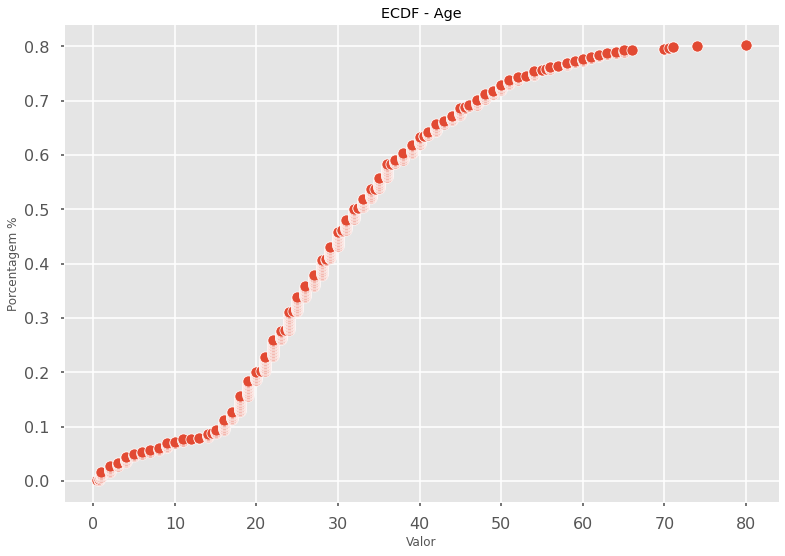

In [113]:
# Podemos fazer o mesmo com idade também:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_age = ECDF(df['Age'])
sns.scatterplot(ecdf_age.x, ecdf_age.y)
plt.title('ECDF - Age')
plt.xlabel('Valor')
plt.ylabel('Porcentagem %')
plt.show()

In [114]:
# Podemos pegar valores de distribuição para qualquer valor:
n = 50
print(f'Quantos % da idade esta abaixo de {n}? Resultado: ', round(ecdf_age(n)*100,2), '%')

Quantos % da idade esta abaixo de 50? Resultado:  72.95 %


# Tratando nulls

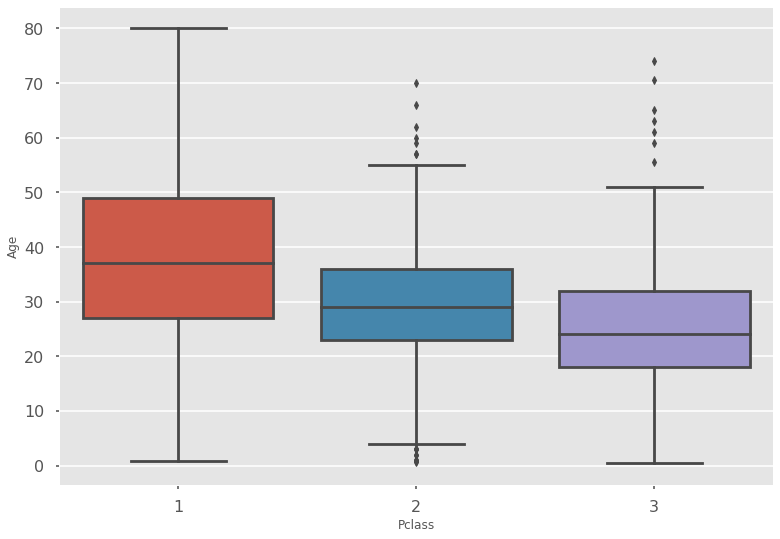

In [115]:
# Visualizando distribuição de idade de cada classe
sns.boxplot(x='Pclass', y='Age', data=df)

In [116]:
media_age_class = df.groupby('Pclass').mean()['Age']
media_age_class

Pclass
1   38.23344
2   29.87763
3   25.14062
Name: Age, dtype: float64

In [117]:
def input_idade(df):
    age = df[0]
    pclass = df[1]
    
    if pd.isnull(age) == True:
        if pclass == 1:
            return media_age_class.values[0]
        elif pclass == 2:
            return media_age_class.values[1]
        else:
            return media_age_class.values[2]
    else:
        return age

In [118]:
df['Age'] = df[['Age', 'Pclass']].apply(input_idade, axis = 1)

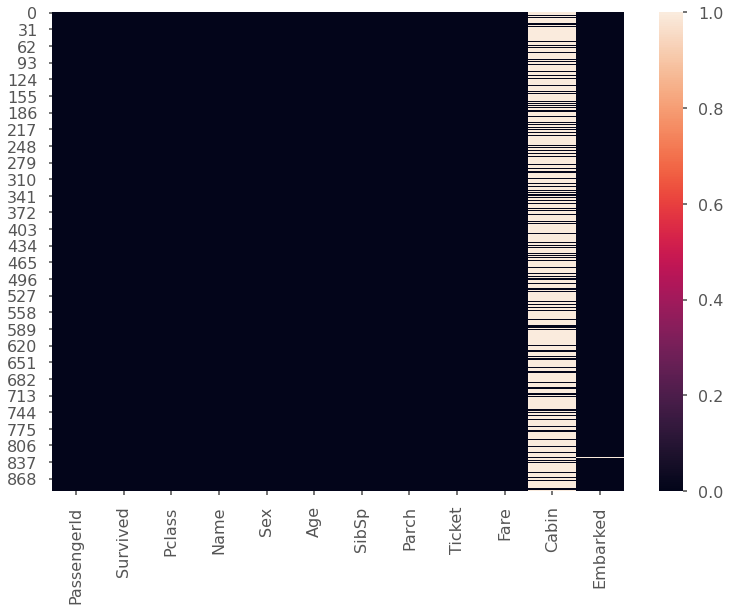

In [119]:
sns.heatmap(df.isnull())

In [120]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [121]:
# Tirarei todas as cabins NaNs e os 2 embarked que estão como NaN
df = df.drop('Cabin', axis=1)

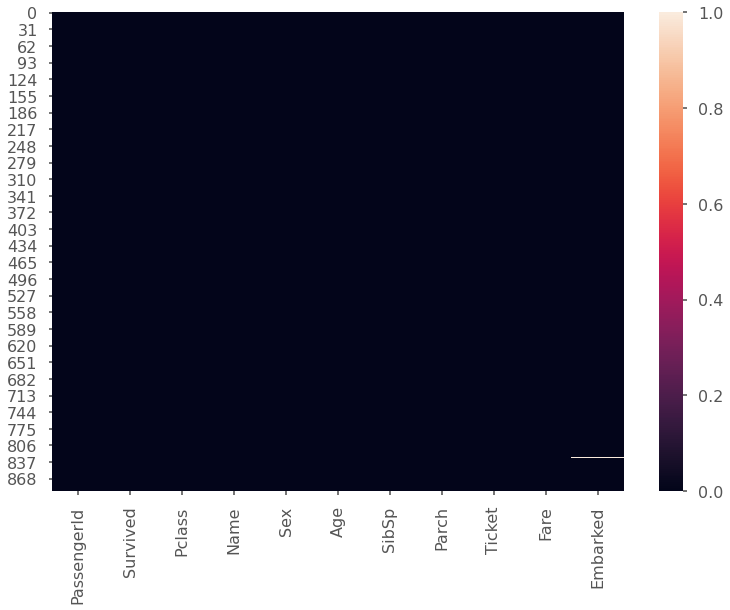

In [122]:
sns.heatmap(df.isnull())

In [123]:
# E então as 2 linhas do embarked
df.dropna(inplace=True)

In [124]:
df.isnull().sum().sum()

0

In [125]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,S


In [126]:
# Transformar váriaveis categóricas

sex = pd.get_dummies(df['Sex'], drop_first=True)
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [128]:
# Retirando váriaveis que não usaremos no modelo
df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace=True)

In [129]:
df = pd.concat([df, sex, embarked], axis = 1)

In [130]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.25000,1,0,1
1,1,1,38.00000,1,0,71.28330,0,0,0
2,1,3,26.00000,0,0,7.92500,0,0,1
3,1,1,35.00000,1,0,53.10000,0,0,1
4,0,3,35.00000,0,0,8.05000,1,0,1


# Criação do Modelo

In [133]:
# Dividindo em X e y
y = df.pop('Survived')
X = df

In [136]:
# Dividindo X e y em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [137]:
# Instanciando modelo e fitando
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
# Acurácia neste tipo de problema não é tão relevante, mas podemos vê-la apenas a titulo de curiosidade
logreg.score(X_test, y_test)

0.797752808988764

In [140]:
y_pred = logreg.predict(X_test)

In [141]:
# Matriz de confusão no formato:
# TP FP
# FN TN
print(confusion_matrix(y_test, y_pred))

[[138  29]
 [ 25  75]]


In [142]:
# Classification report com métricas mais usaveis neste tipo de problema
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



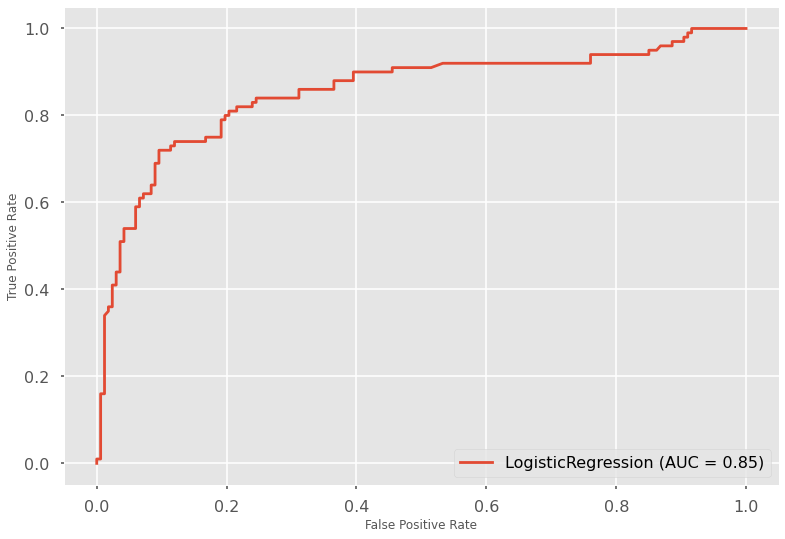

In [149]:
# Curva ROC para poder comparar força do classificador 
plot_roc_curve(logreg, X_test, y_test)